Week-6 AP21110010966

In [21]:
#Implement K-NN Classifier for classification of any dataset of your choice.
#    a. Load an existing data set
#    b. Split the data set to train and test sets
#    c. Test your model using test set. Find accuracy and confusion Matrix.
#    d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
#    accuracy” and find out the value of k for maximum accuracy for the test samples.


In [20]:
import pandas as pd

file_path = "tips.csv"  
drugdata = pd.read_csv(file_path)

print(drugdata.head())


   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1         NaN  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = "tips.csv"
tips = pd.read_csv(file_path)

label_encoders = {}
for column in tips.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    tips[column] = label_encoders[column].fit_transform(tips[column])

print(tips.head())


   Unnamed: 0  total_bill   tip  sex  smoker  day  time  size
0           0       16.99  1.01    0       0    2     0     2
1           1         NaN  1.66    1       0    2     0     3
2           2       21.01  3.50    1       0    2     0     3
3           3       23.68  3.31    1       0    2     0     2
4           4       24.59  3.61    0       0    2     0     4


In [10]:
import csv
import random

def load_csv(filename):
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        data = [row for row in csv_reader]
    return data

def split_data(dataset, split_ratio=0.8):
    dataset_copy = list(dataset)
    train_size = int(len(dataset_copy) * split_ratio)
    train_set = []
    while len(train_set) < train_size:
        index = random.randrange(len(dataset_copy))
        train_set.append(dataset_copy.pop(index))
    return train_set, dataset_copy

filename = 'tips.csv'
tips_data = load_csv(filename)

train_set, test_set = split_data(tips_data, split_ratio=0.8)

for row in train_set[:5]:
    print(row)

print("\nTesting Set:")
for row in test_set[:5]:
    print(row)

['70', '', '1.97', 'Male', 'No', 'Sat', 'Dinner', '2']
['215', '', '1.1', 'Female', 'Yes', 'Sat', 'Dinner', '2']
['75', '', '1.25', 'Male', 'No', 'Sat', 'Dinner', '2']
['0', '16.99', '1.01', 'Female', 'No', 'Sun', 'Dinner', '2']
['', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

Testing Set:
['9', '14.78', '3.23', 'Male', 'No', 'Sun', 'Dinner', '2']
['16', '', '1.67', 'Female', 'No', 'Sun', 'Dinner', '3']
['30', '9.55', '1.45', 'Male', 'No', 'Sat', 'Dinner', '2']
['42', '13.94', '3.06', 'Male', 'No', 'Sun', 'Dinner', '2']
['43', '9.68', '1.32', 'Male', 'No', 'Sun', 'Dinner', '2']


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "tips.csv"
tips = pd.read_csv(file_path)

X = tips.drop(columns=['size'])  
y = tips['size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (183, 7)
X_test shape: (61, 7)
y_train shape: (183,)
y_test shape: (61,)


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

file_path = "tips.csv"
tips = pd.read_csv(file_path)


X = tips.drop(columns=['size'])
y = tips['size']

label_encoders = {}
for column in X.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test.to_numpy():
        
        for i, value in enumerate(test_point):
            if isinstance(value, str):
                test_point[i] = label_encoders[X.columns[i]].transform([value])[0]

        distances = [euclidean_distance(test_point, train_point) for train_point in X_train.to_numpy()]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = [y_train.iloc[i] for i in nearest_indices]
        y_pred.append(max(set(nearest_labels), key=nearest_labels.count))
    return y_pred

def accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    return correct / len(y_true)

def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(labels)}
    for true, pred in zip(y_true, y_pred):
        matrix[label_to_index[true]][label_to_index[pred]] += 1
    return matrix

k = 5  
y_pred = predict(X_train, y_train, X_test, k)

acc = accuracy(y_test.to_numpy(), y_pred)
conf_matrix = confusion_matrix(y_test.to_numpy(), y_pred, labels=np.unique(y_test))

print("Accuracy:", acc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6938775510204082
Confusion Matrix:
 [[ 0  2  0  0  0  0]
 [ 0 29  1  0  0  0]
 [ 0  5  3  0  0  0]
 [ 0  4  1  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  1  0  0]]


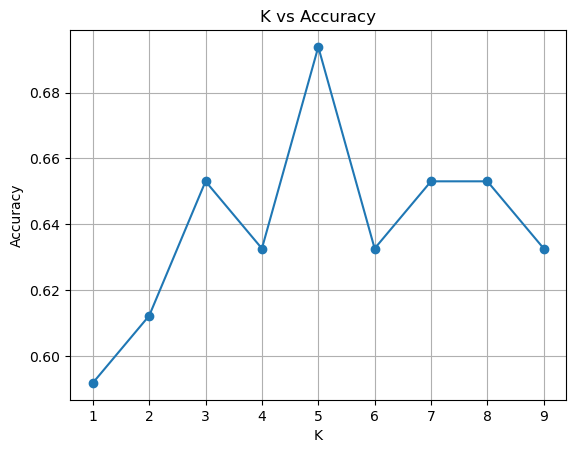

Value of k for maximum accuracy: 5


In [19]:
import matplotlib.pyplot as plt


def evaluate_knn(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    for k in k_values:
        y_pred = predict(X_train, y_train, X_test, k)
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)
    return accuracies


k_values = range(1, 10) 

accuracies = evaluate_knn(X_train, y_train, X_test, y_test, k_values)


plt.plot(k_values, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

max_accuracy = max(accuracies)
best_k = k_values[accuracies.index(max_accuracy)]
print("Value of k for maximum accuracy:", best_k)